In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## TODO: Replace with the path to your dataset
PATH_TO_DATASET = '/Users/justina-irene/Desktop/nlp_project/complaints.csv' 
############################################################

df = pd.read_csv(PATH_TO_DATASET)
df.head()

/Users/justina-irene/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-02-02,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,12919,NaN,Consent not provided,Web,2022-02-02,Closed with non-monetary relief,Yes,NaN,5177559
1,2022-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",WA,98056,NaN,NaN,Web,2022-03-14,Closed with explanation,Yes,NaN,5321616
2,2022-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,NaN,"EQUIFAX, INC.",GA,31909,NaN,NaN,Web,2022-03-14,Closed with explanation,Yes,NaN,5319887
3,2022-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",OH,44133,NaN,Other,Web,2022-03-14,Closed with explanation,Yes,NaN,5320509
4,2022-04-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",ME,04342,NaN,NaN,Web,2022-04-01,In progress,Yes,NaN,5394173


<AxesSubplot:>

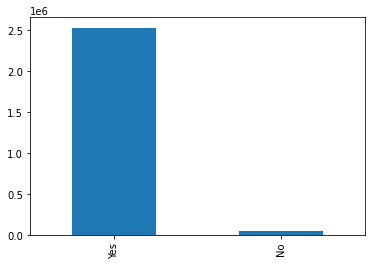

In [9]:
df['Timely response?'].value_counts().plot(kind='bar')

<AxesSubplot:>

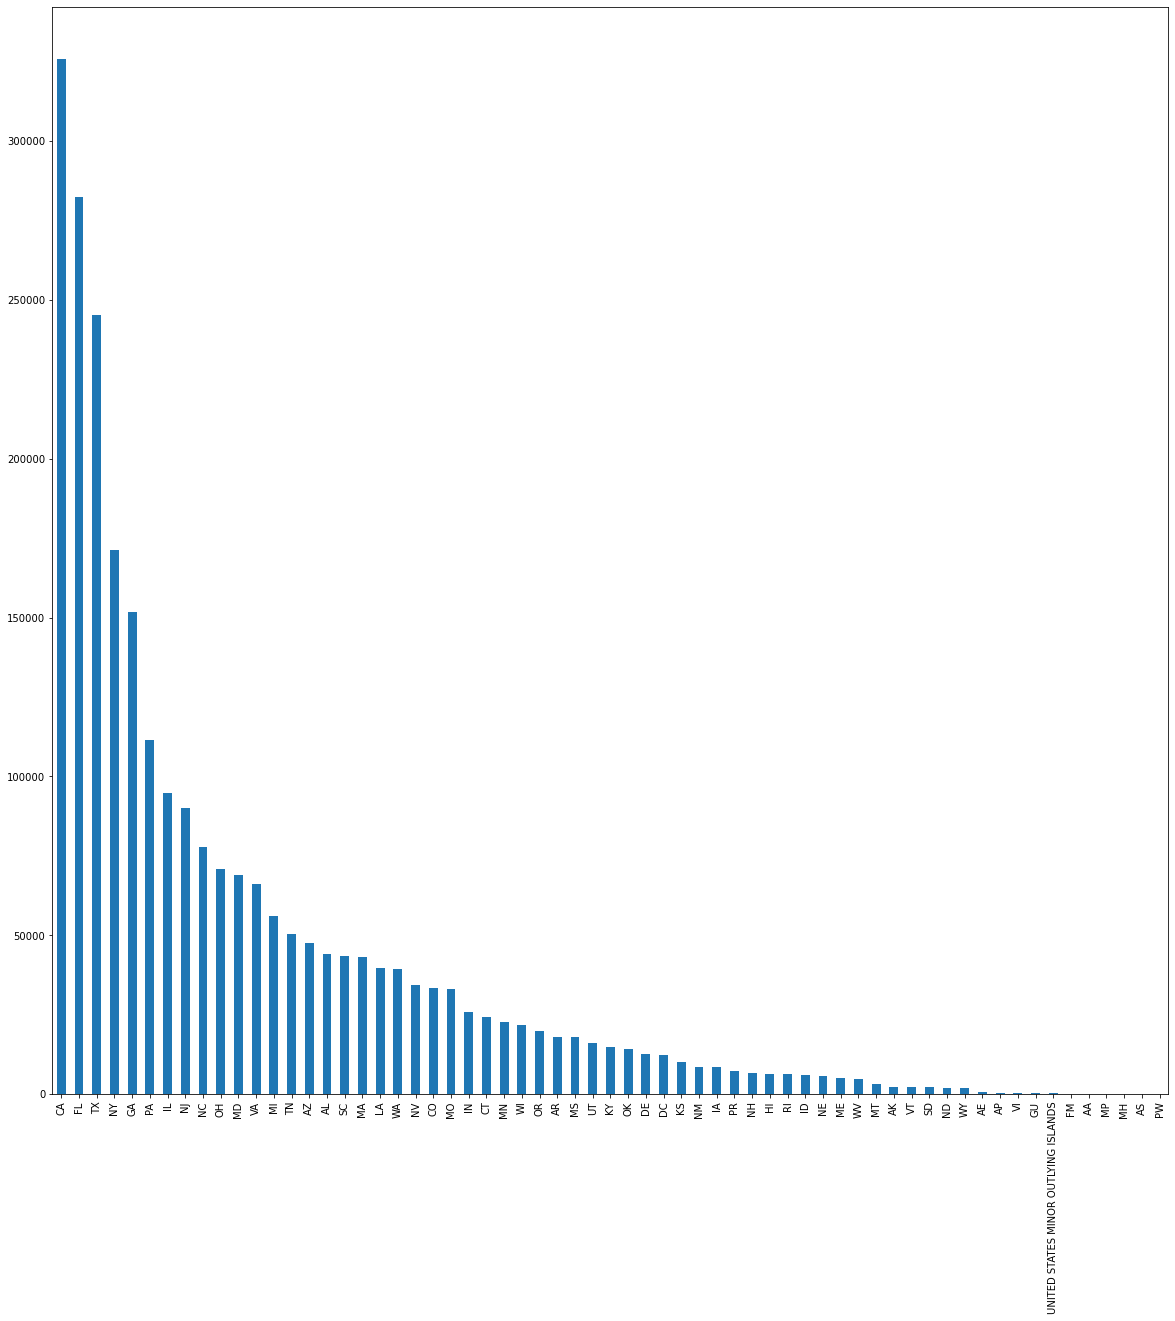

In [12]:
plt.figure(figsize=(20, 20))
df['State'].value_counts().plot(kind='bar')

TOP 20 issues

<AxesSubplot:>

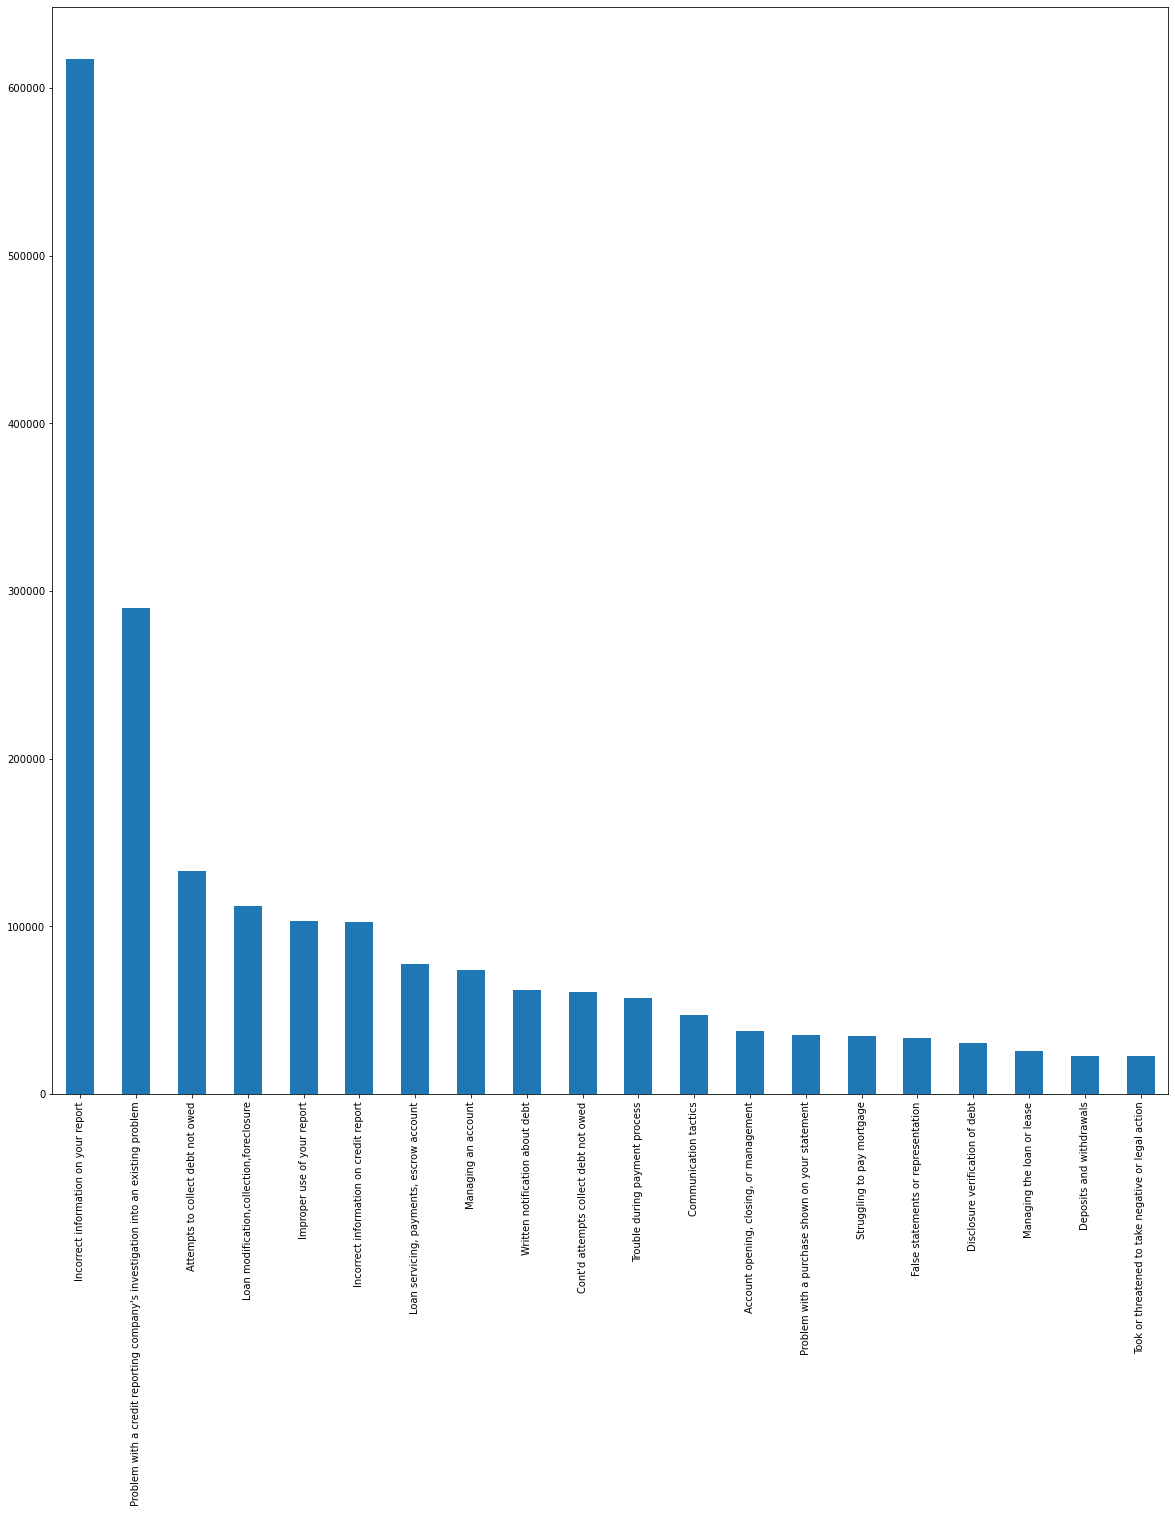

In [15]:
plt.figure(figsize=(20, 20))
df['Issue'].value_counts()[:20].plot(kind='bar')

Top 20 the company name for number of complaints

<AxesSubplot:>

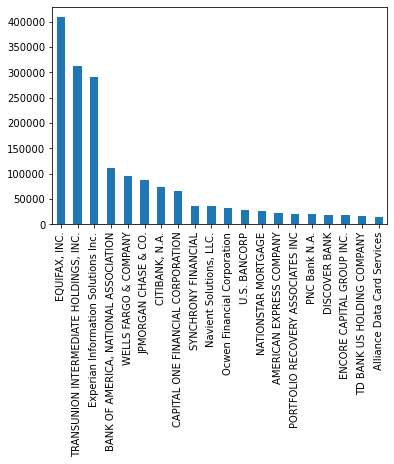

In [18]:
df['Company'].value_counts()[:20].plot(kind='bar')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573063 entries, 0 to 2573062
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 353.

In [5]:
print(df.isnull().sum())

Date received                         0
Product                               0
Sub-product                      235163
Issue                                 0
Sub-issue                        653711
Consumer complaint narrative    1671477
Company public response         1506530
Company                               0
State                             39264
ZIP code                          39509
Tags                            2268781
Consumer consent provided?       758078
Submitted via                         0
Date sent to company                  0
Company response to consumer          3
Timely response?                      0
Consumer disputed?              1804605
Complaint ID                          0
dtype: int64


235163/2573063 = 9.1%
653711/2573063 =25%
Consumer complaint narrative，Company public response, Tags, Consumer disputed? need to drop
Sub-product，Sub-issue，State，ZIP code，Consumer consent provided? missing value can be replaced by median

In [6]:
df = df.drop(['Consumer complaint narrative','Company public response','Tags','Consumer disputed?'], axis=1)
df['Sub-product'].fillna(df['Sub-product'].mode(), inplace=True)
df['Sub-issue'].fillna(df['Sub-issue'].mode(), inplace=True)
df['State'].fillna(df['State'].mode(), inplace=True)
df['ZIP code'].fillna(df['ZIP code'].mode(), inplace=True)
df['Consumer consent provided?'].fillna(df['Consumer consent provided?'].mode(), inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573063 entries, 0 to 2573062
Data columns (total 14 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Company                       object
 6   State                         object
 7   ZIP code                      object
 8   Consumer consent provided?    object
 9   Submitted via                 object
 10  Date sent to company          object
 11  Company response to consumer  object
 12  Timely response?              object
 13  Complaint ID                  int64 
dtypes: int64(1), object(13)
memory usage: 274.8+ MB
